# Perceptron : Binary Classifier

- Perceptron is inspired by the biological neuron cell of nerve system, and the idea is explored over many classification problems.

## Biological Neural System

![Neuron](https://upload.wikimedia.org/wikipedia/commons/b/bd/Neuron.jpg)

The basic operation of the neuron is following:
1. Recieve the electrical signal at dendrites.
2. Signals gather in the cell body, create an electrical potential.
3. If the potential is enough to overcome the myelin sheath's potential, signal pass through.
4. Signal exit through axon terminal, and pass to the next connected neurons.

As a series of signals pass through the network of neurons, some interesting phenomenon happens that changes internal neuron structure. Biological neural system usually comes with un-trained system, and it takes some period of learning process to function properly. In order to fully transfer this biological system to computational device, it is important to think about what actually happens when brain tries to learn about any input signals.

In neuroscience, one of the main idea can be summarized as following:

> When a series of neurons repeatedly fires the similar signals, some changes take place to those cells such that the electrical resistance and threshold decreases, so that it is easier for the network to pass through the same signal.

### Experiment of Pavlov

![Pavlov](https://upload.wikimedia.org/wikipedia/commons/thumb/7/70/Pavlov%27s_dog_conditioning.svg/510px-Pavlov%27s_dog_conditioning.svg.png)

Famous experiment of Pavlov with dog salivating is a good example of how the learning process takes place.

## Artificial Neuron Model

![AN](https://upload.wikimedia.org/wikipedia/commons/8/8c/Perceptron_moj.png)

- This artificial neuron mimics an operation of biological neuron. It takes multiple input signals and calculate a weighted sum. If the total sum is enough to overcome the threshold, neuron fires output signal.
- Throughout this example, the activation function will be Heaviside function.

In [5]:
# Simple Artificial Neuron Example with two input
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Simplest neuron
def neuron(x, w, threshold = 0, bias = 0):
    activation = lambda t: int(t > threshold)
    s = np.dot(x,w) + bias
    return activation(s)

In [3]:
# Define Network
w = np.array([1,-1])
model = lambda x : neuron(x, w)

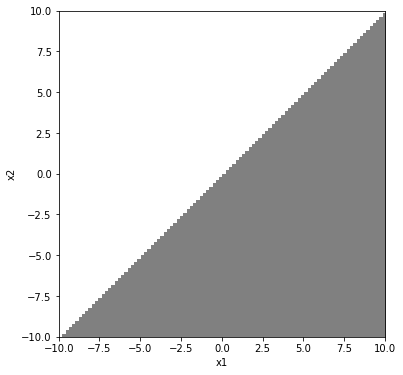

In [6]:
# Visualize (x1,x2)
fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_xlabel('x1')
subplot.set_ylabel('x2')
subplot.set_ylim([-10,10])
subplot.set_xlim([-10,10])

# Draw
field = [[ model( np.array([x1,x2]))
          for x1 in np.linspace(-10,10,100)]
          for x2 in np.linspace(-10,10,100)]
subplot.imshow(field, origin='lower', extent=(-10,10,-10,10),
               cmap=plt.cm.gray_r, alpha=0.5)

- Notice, this neuron acts as a simple binary classifier, whether a data satisfy the condition (x1>x2).
- It is possible to make more 'soft' classifier by changing activation function. Below is another example of using sigmoid function.

2.0


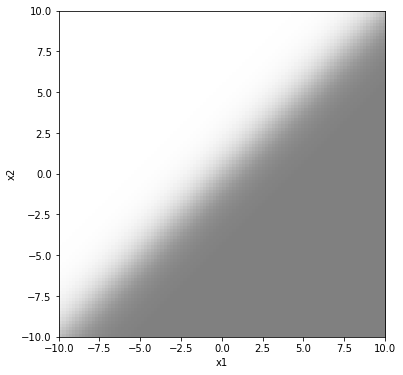

In [21]:
# Neuron with Sigmoid
def neuron_sigmoid(x, w, threshold = 0, bias = 0):
    activation = lambda t: 1/(1+np.exp(-t))
    s = np.dot(x,w) + bias
    return activation(s)

# Define Network
w = np.array([1,-1])
model = lambda x : neuron_sigmoid(x, w)

# Visualize (x1,x2)
fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_xlabel('x1')
subplot.set_ylabel('x2')
subplot.set_ylim([-10,10])
subplot.set_xlim([-10,10])

# Draw
field = [[ model( np.array([x1,x2]))
          for x1 in np.linspace(-10,10,100)]
          for x2 in np.linspace(-10,10,100)]
subplot.imshow(field, origin='lower', extent=(-10,10,-10,10),
               cmap=plt.cm.gray_r, alpha=0.5)

## 2-Layered Artificial Neural Network

![2 Layered ANN](./images/doublelayerANN_sketch.png)



In [42]:
# Define Network
w1 = np.array([1,-1])
w2 = np.array([-0.7,2])
w3 = np.array([-1,0.2])

def double_layer_model(x):
    hidden1 = neuron_sigmoid(x,w1, bias=0.3)
    hidden2 = neuron_sigmoid(x,w2, bias=-0.3)
    return neuron_sigmoid(np.array([hidden1, hidden2]), w3)

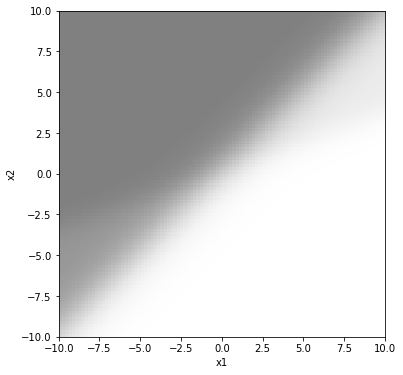

In [43]:
# Visualize (x1,x2)
fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_xlabel('x1')
subplot.set_ylabel('x2')
subplot.set_ylim([-10,10])
subplot.set_xlim([-10,10])

# Draw
field = [[ double_layer_model( np.array([x1,x2]))
          for x1 in np.linspace(-10,10,100)]
          for x2 in np.linspace(-10,10,100)]
subplot.imshow(field, origin='lower', extent=(-10,10,-10,10),
               cmap=plt.cm.gray_r, alpha=0.5)